#### X Education wants to select the most promising leads, i.e. the leads that are most likely to convert into paying customers.So for this,company requires us to build a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. 

In [1]:
## Importing important libararies
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
#Data display
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
 


#### Reading and Understanding Dataset

In [2]:
# reading dataset
leads_df = pd.read_csv("Leads.csv")
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

We can see that there are 7 numerical columns and remaining 30 columns are categorical variables.

In [4]:
# Let's describe the data and have some statistical idea about the dataset like outlers, mean, std etc.

leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


As we can see from the above describe table, some variable columns like 'totalVisits','Total Time Spent on Website' and 'Page Views Per Visit' are having outliers while others not so much.

And from the above two tables we can see that there are some count mismatch and also some columns are redundant. Hence, first we will try to remove those redundant columns and after that we will check the missing values in the dataset.

In [5]:
#Checking for duplicates if any
sum(leads_df.duplicated(subset = 'Prospect ID')) == 0

True

In [6]:
#understanding dataset
leads_df.shape

(9240, 37)

We can see that, there are 9240 rows and 37 columns in the given dataset.

#### Cleaning Data and Data Preparation

In [7]:
## dropping coloums which are not useful for our purpose
leads_df.drop(['Lead Number'], axis = 1, inplace = True)

In [8]:
leads_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


Here we can see that there are some columns/categorical variables having label as 'Select' which means the customer was not selected any option hence it is better to put it as null value - Because there was no suitable option present to select for the customer searching for.

In [9]:
# Converting 'Select' values to NaN.
leads_df = leads_df.replace('Select', np.nan)

In [10]:
#checking for null values
leads_df.isnull().sum()

Prospect ID                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [11]:
#Renaming Colums ad given format giving errors while using with function
leads_df = leads_df.rename(columns = {'Lead Source':'LeadSource','Do Not Email':'Do_Not_Email','Do Not Call':'Do_Not_Call','Total Time Spent on Website':'Total_Time_Spent'                         
,'Page Views Per Visit': 'PageViews_PerVisit', 'Last Activity':'Last_Activity',                         
'How did you hear about X Education':'Recommendation_Medium',            
'What is your current occupation':'Current_Occupation',                  
'What matters most to you in choosing a course':'Requirements' , 
'Newspaper Article':'Newspaper_Article',                                   
'X Education Forums':'X_Education_Forums','Digital Advertisement':'Digital_Advertisement',                               
'Through Recommendations':'Through_Recommendations',                           
'Receive More Updates About Our Courses': 'Receive_Updates_XCourses',           
'Lead Quality':'Lead_Quality',                                 
'Update me on Supply Chain Content':'Receive_Update_SCC',                
'Get updates on DM Content':'Receive_Update_DMC',                        
'Lead Profile':'Lead_Profile' , 'Asymmetrique Activity Index':'Asymmetrique_Activity_Index',                      
'Asymmetrique Profile Index' :'Asymmetrique_Profile_Index',                   
'Asymmetrique Activity Score' :'Asymmetrique_Activity_Score',                   
'Asymmetrique Profile Score':'Asymmetrique_Profile_Score',                   
'I agree to pay the amount through cheque':'Agree_cheque_payment',            
'A free copy of Mastering The Interview':'Mastering_Interview_freecopy','Last Notable Activity':'Last_Notable_Activity' ,'Lead Origin':'Lead_Origin' })

**Note:** We have renamed most of the columns since we were getting some error while finding value_counts() and this is optional.

In [12]:
leads_df.head()

,Prospect ID,Lead_Origin,LeadSource,Do_Not_Email,Do_Not_Call,Converted,TotalVisits,Total_Time_Spent,PageViews_PerVisit,Last_Activity,Country,Specialization,Recommendation_Medium,Current_Occupation,Requirements,Search,Magazine,Newspaper_Article,X_Education_Forums,Newspaper,Digital_Advertisement,Through_Recommendations,Receive_Updates_XCourses,Tags,Lead_Quality,Receive_Update_SCC,Receive_Update_DMC,Lead_Profile,City,Asymmetrique_Activity_Index,Asymmetrique_Profile_Index,Asymmetrique_Activity_Score,Asymmetrique_Profile_Score,Agree_cheque_payment,Mastering_Interview_freecopy,Last_Notable_Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [13]:
# Checking missing value percentage
percent_missing = leads_df.isnull().sum() * 100 / len(leads_df)
percent_missing

Prospect ID                      0.000000
Lead_Origin                      0.000000
LeadSource                       0.389610
Do_Not_Email                     0.000000
Do_Not_Call                      0.000000
Converted                        0.000000
TotalVisits                      1.482684
Total_Time_Spent                 0.000000
PageViews_PerVisit               1.482684
Last_Activity                    1.114719
Country                         26.634199
Specialization                  36.580087
Recommendation_Medium           78.463203
Current_Occupation              29.112554
Requirements                    29.318182
Search                           0.000000
Magazine                         0.000000
Newspaper_Article                0.000000
X_Education_Forums               0.000000
Newspaper                        0.000000
Digital_Advertisement            0.000000
Through_Recommendations          0.000000
Receive_Updates_XCourses         0.000000
Tags                            36

The columns which are having missing values more than 40% can be dropped.

In [14]:
## dropping columns which has more than 40% missing values or sales generated information
leads_df.drop(['Asymmetrique_Activity_Index', 'Asymmetrique_Profile_Index','Asymmetrique_Activity_Score', 'Asymmetrique_Profile_Score','Tags','Lead_Quality','Last_Notable_Activity','Last_Activity'], axis = 1, inplace = True)

In [15]:
# Cleaning the missing data
# listing the null values columns having more than 40%
missing_values=leads_df.isnull().sum()
missing_values=missing_values[missing_values.values>(0.4*len(missing_values))]
len(missing_values)

10

In [16]:
#Dropping columns having null values more than 50% 
leads_df= leads_df.loc[:, leads_df.isnull().mean() <= 0.5]
leads_df.shape

(9240, 26)

In [17]:
leads_df.isnull().sum()*100/len(leads_df)

Prospect ID                      0.000000
Lead_Origin                      0.000000
LeadSource                       0.389610
Do_Not_Email                     0.000000
Do_Not_Call                      0.000000
Converted                        0.000000
TotalVisits                      1.482684
Total_Time_Spent                 0.000000
PageViews_PerVisit               1.482684
Country                         26.634199
Specialization                  36.580087
Current_Occupation              29.112554
Requirements                    29.318182
Search                           0.000000
Magazine                         0.000000
Newspaper_Article                0.000000
X_Education_Forums               0.000000
Newspaper                        0.000000
Digital_Advertisement            0.000000
Through_Recommendations          0.000000
Receive_Updates_XCourses         0.000000
Receive_Update_SCC               0.000000
Receive_Update_DMC               0.000000
City                            39

In [18]:
leads_df.shape

(9240, 26)

After dropping the columns having more than 40% missing values we got 9240 rows and 26 columns in our dataframe.

In [19]:
leads_df.isnull().sum()

Prospect ID                        0
Lead_Origin                        0
LeadSource                        36
Do_Not_Email                       0
Do_Not_Call                        0
Converted                          0
TotalVisits                      137
Total_Time_Spent                   0
PageViews_PerVisit               137
Country                         2461
Specialization                  3380
Current_Occupation              2690
Requirements                    2709
Search                             0
Magazine                           0
Newspaper_Article                  0
X_Education_Forums                 0
Newspaper                          0
Digital_Advertisement              0
Through_Recommendations            0
Receive_Updates_XCourses           0
Receive_Update_SCC                 0
Receive_Update_DMC                 0
City                            3669
Agree_cheque_payment               0
Mastering_Interview_freecopy       0
dtype: int64

Now, we are left with the data where some columns have missing value percentage less than 40, so, we will impute such columns in further steps.

### Data Preparation

In [20]:
#Imputing missing values with mean as few values are missing
leads_df['TotalVisits'] = leads_df['TotalVisits'].fillna(leads_df['TotalVisits'].mean())
leads_df['PageViews_PerVisit'] = leads_df['PageViews_PerVisit'].fillna(leads_df['PageViews_PerVisit'].mean())

In [21]:
leads_df.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [22]:
###Missing value imputation
leads_df['Specialization'] = leads_df['Specialization'].replace(np.nan, 'Others')

In [23]:
leads_df.LeadSource.value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
WeLearn                 1
Pay per Click Ads       1
welearnblog_Home        1
NC_EDM                  1
blog                    1
youtubechannel          1
testone                 1
Name: LeadSource, dtype: int64

In [24]:
#Replacing rows value with 'Others' which are only few in number
leads_df['LeadSource'] = leads_df['LeadSource'].replace(['google'], 'Google')
leads_df['LeadSource'] = leads_df['LeadSource'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads',
'Press_Release','Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

In [25]:
#Imputing null values with mode as they are small in number
leads_df['LeadSource'] = leads_df['LeadSource'].fillna(leads_df['LeadSource'].mode()[0])

In [26]:
# Let's start with first columns of missing values

leads_df['LeadSource'].value_counts().head(5)   # Lead Source column

Google            2909
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Name: LeadSource, dtype: int64

**Google is having highest number of occurences, hence we will impute the missing values with label 'Google'**

### Univariate Analysis

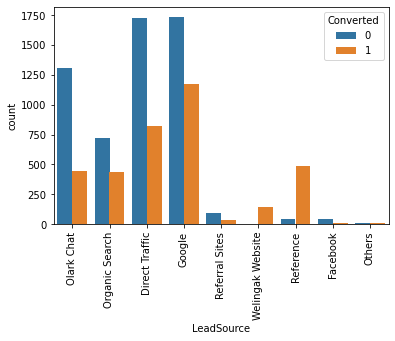

In [27]:
#plotting 'LeadSource' 
sns.countplot(x = "LeadSource", hue = "Converted", data = leads_df),
xticks(rotation = 90)
plt.show()

**Inferences:**
1. Google and Direct traffic generates maximum number of leads.
2. Conversion Rate of reference leads and leads through welingak website is high.

**To improve overall lead conversion rate, our focus should be on improving lead conversion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.**

In [28]:
leads_df.Current_Occupation.value_counts()           

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: Current_Occupation, dtype: int64

In [29]:
leads_df.Newspaper_Article.value_counts()              

No     9238
Yes       2
Name: Newspaper_Article, dtype: int64

In [30]:
leads_df.X_Education_Forums.value_counts()             

No     9239
Yes       1
Name: X_Education_Forums, dtype: int64

In [31]:
leads_df.Newspaper.value_counts()                        


No     9239
Yes       1
Name: Newspaper, dtype: int64

In [32]:
leads_df.Digital_Advertisement.value_counts()            


No     9236
Yes       4
Name: Digital_Advertisement, dtype: int64

In [33]:
leads_df.Through_Recommendations.value_counts()        


No     9233
Yes       7
Name: Through_Recommendations, dtype: int64

In [34]:
leads_df.Receive_Updates_XCourses.value_counts()         


No    9240
Name: Receive_Updates_XCourses, dtype: int64

In [35]:
leads_df.Receive_Update_SCC.value_counts()

No    9240
Name: Receive_Update_SCC, dtype: int64

In [36]:
leads_df.Receive_Update_DMC.value_counts() 

No    9240
Name: Receive_Update_DMC, dtype: int64

In [37]:
leads_df.Requirements.value_counts()  

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: Requirements, dtype: int64

In [38]:
leads_df.Search.value_counts()  

No     9226
Yes      14
Name: Search, dtype: int64

In [39]:
leads_df.Lead_Origin.value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead_Origin, dtype: int64

In [40]:
leads_df.Do_Not_Call.value_counts()

No     9238
Yes       2
Name: Do_Not_Call, dtype: int64

In [41]:
leads_df.Do_Not_Email.value_counts()

No     8506
Yes     734
Name: Do_Not_Email, dtype: int64

In [42]:
leads_df.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
Germany                    4
South Africa               4
Canada                     4
Nigeria                    4
Sweden                     3
Bangladesh                 2
China                      2
Asia/Pacific Region        2
Netherlands                2
Ghana                      2
Belgium                    2
Italy                      2
Philippines                2
Uganda                     2
Switzerland                1
Indonesia                  1
Russia                     1
Kenya                      1
Denmark                    1
Liberia                    1
Tanzania      

In [43]:
leads_df.Agree_cheque_payment.value_counts()  

No    9240
Name: Agree_cheque_payment, dtype: int64

In [44]:
leads_df.Mastering_Interview_freecopy.value_counts() 

No     6352
Yes    2888
Name: Mastering_Interview_freecopy, dtype: int64

In [45]:
leads_df.City.value_counts() 

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [46]:
#Replacing null values with 'Unknown'as more than 3600 values are missing
leads_df['City'] = leads_df['City'].replace('np.nan', 'Unknown')
leads_df.City.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [47]:
leads_df.Current_Occupation.value_counts() 

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: Current_Occupation, dtype: int64

In [48]:
#Replacing null values with 'no details' as good number of values are missing
leads_df['Current_Occupation'] = leads_df['Current_Occupation'].replace(np.nan, 'No Detais')


In [49]:
leads_df.Requirements.value_counts() 

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: Requirements, dtype: int64

In [50]:
#Replacing null values with 'Unknown' as more than 2700 values are missing
leads_df['Requirements'] = leads_df['Requirements'].replace(np.nan, 'Unknown')


In [51]:
leads_df.isnull().sum()

Prospect ID                        0
Lead_Origin                        0
LeadSource                         0
Do_Not_Email                       0
Do_Not_Call                        0
Converted                          0
TotalVisits                        0
Total_Time_Spent                   0
PageViews_PerVisit                 0
Country                         2461
Specialization                     0
Current_Occupation                 0
Requirements                       0
Search                             0
Magazine                           0
Newspaper_Article                  0
X_Education_Forums                 0
Newspaper                          0
Digital_Advertisement              0
Through_Recommendations            0
Receive_Updates_XCourses           0
Receive_Update_SCC                 0
Receive_Update_DMC                 0
City                            3669
Agree_cheque_payment               0
Mastering_Interview_freecopy       0
dtype: int64

### Bivariate and Multivariate analysis

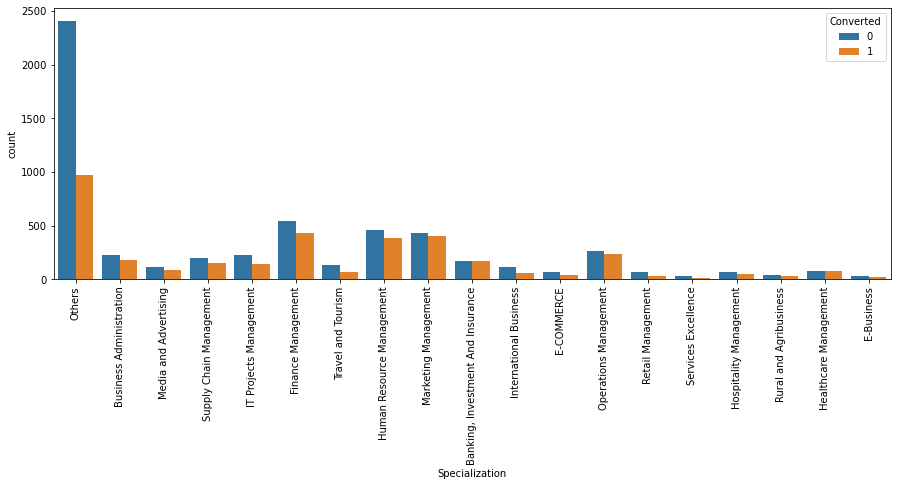

In [52]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = 'Specialization', hue = 'Converted', data = leads_df)
xticks(rotation = 90)
plt.show()

**Note:**
It maybe the case that lead has not entered any specialization if his/her option is not availabe on the list, he/she may not have any specialization or is a student.Hence we have made a category "Others" for missing values. 

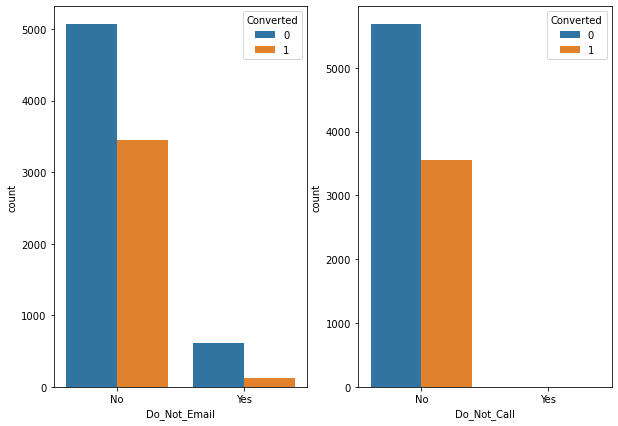

In [53]:
fig, axs = plt.subplots(1,2,figsize = (10,7))
sns.countplot(x = "Do_Not_Email", hue = "Converted", data = leads_df, ax = axs[0])
sns.countplot(x = "Do_Not_Call", hue = "Converted", data = leads_df, ax = axs[1])
plt.show()

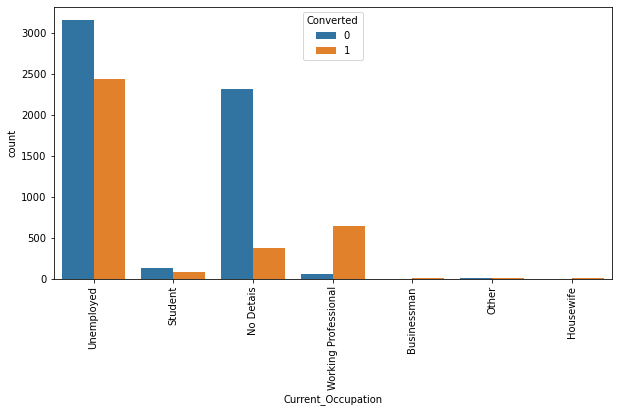

In [54]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = 'Current_Occupation', hue = 'Converted', data = leads_df)
xticks(rotation = 90)
plt.show()

**Inference:**
1. Working Professionals going for the course have high chances of joining it.
2. Unemployed leads are the most in numbers and have high conversion rate.

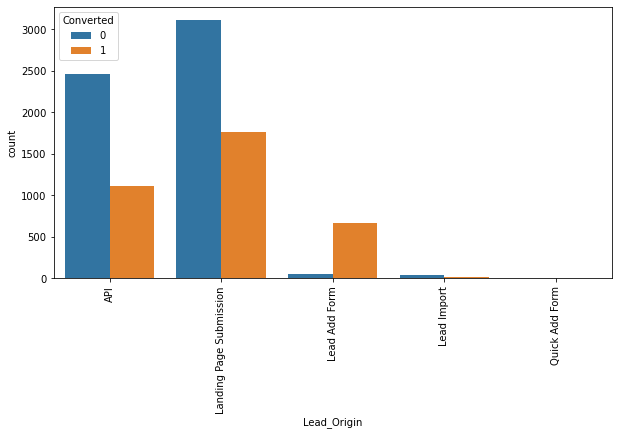

In [55]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = 'Lead_Origin', hue = 'Converted', data = leads_df)
xticks(rotation = 90)
plt.show()

**Inferences:**
1. API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.
2. Lead Add Form has more than 90% conversion rate but count of lead are not very high.
3. Lead Import are very less in count.

**To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.**

In [56]:
leads_df.select_dtypes('int64').columns 

Index(['Converted', 'Total_Time_Spent'], dtype='object')

In [57]:
leads_df.describe()

,Converted,TotalVisits,Total_Time_Spent,PageViews_PerVisit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.445238,487.698268,2.362820
std,0.486714,4.818723,548.021466,2.145333
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


In [58]:
## Importing libararies for visualization
import matplotlib.pyplot as plt
import seaborn as sns

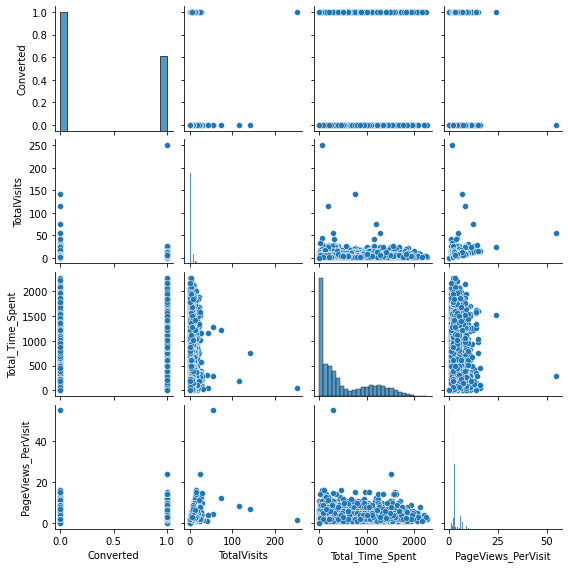

In [59]:
sns.pairplot(leads_df,height=2)
plt.show()

### Checking for outliers

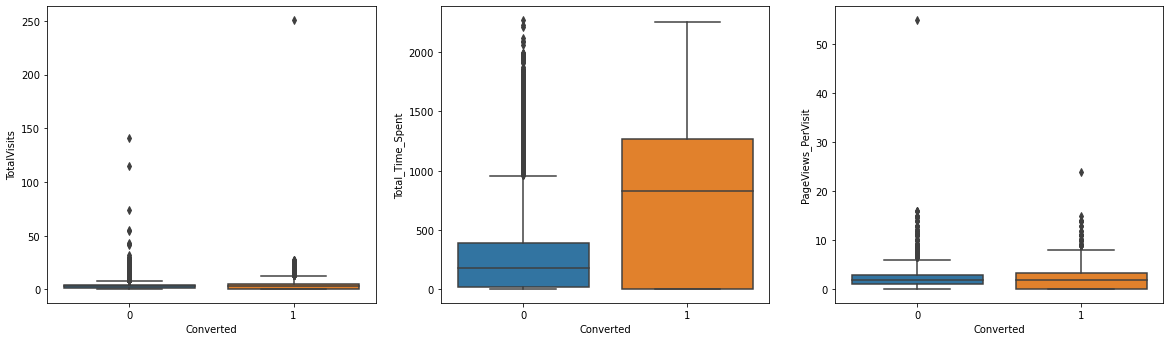

In [60]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot( y= 'TotalVisits', x = 'Converted', data = leads_df)
plt.subplot(2,3,2)
sns.boxplot(y = 'Total_Time_Spent', x = 'Converted', data = leads_df)
plt.subplot(2,3,3)
sns.boxplot(y = 'PageViews_PerVisit', x = 'Converted', data = leads_df)
plt.show()

In [61]:
# capping for outlier treatment
f = ['TotalVisits','Total_Time_Spent','PageViews_PerVisit']
for i in f:
    q1 = leads_df[i].quantile(0.01)
    leads_df[i][leads_df[i]<=q1] = q1
    q4 = leads_df[i].quantile(0.99)
    leads_df[i][leads_df[i]>=q4] = q4

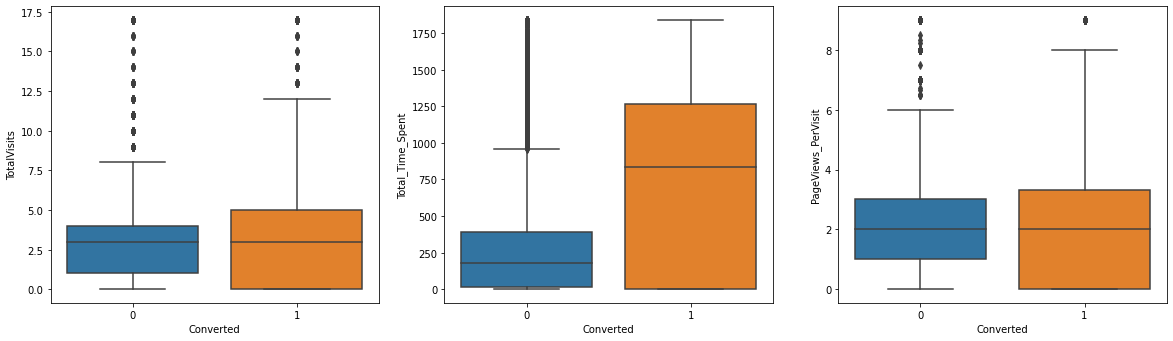

In [62]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot( y= 'TotalVisits', x = 'Converted', data = leads_df)
plt.subplot(2,3,2)
sns.boxplot(y = 'Total_Time_Spent', x = 'Converted', data = leads_df)
plt.subplot(2,3,3)
sns.boxplot(y = 'PageViews_PerVisit', x = 'Converted', data = leads_df)
plt.show()

**Inferences:**
1. **'TotalVisits'**--> Median for converted and not converted leads are the same. Nothing can be concluded on the basis of Total Visits.
2. **'Total_Time_Spent'**-->Leads spending more time on the website are more likely to be converted. So, the Website should be made more engaging to make leads spend more time.
3. **'PageViews_PerVisit'**-->Median for converted and unconverted leads is the same. Nothing can be said specifically for lead conversion from Page Views Per Visit.

In [63]:
#Dropping columns with not so meaningful insights
leads_df = leads_df.drop(['Requirements','Search','Magazine','Newspaper_Article','X_Education_Forums','Newspaper','Digital_Advertisement',
'Through_Recommendations','Receive_Updates_XCourses','Receive_Update_SCC', 'Receive_Update_DMC','Agree_cheque_payment',
'Mastering_Interview_freecopy','Country'],1)

In [64]:
leads_df.head()

,Prospect ID,Lead_Origin,LeadSource,Do_Not_Email,Do_Not_Call,Converted,TotalVisits,Total_Time_Spent,PageViews_PerVisit,Specialization,Current_Occupation,City
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0.0,0.0,Others,Unemployed,NaN
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674.0,2.5,Others,Unemployed,NaN
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532.0,2.0,Business Administration,Student,Mumbai
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305.0,1.0,Media and Advertising,Unemployed,Mumbai
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428.0,1.0,Others,Unemployed,Mumbai


In [65]:
leads_df.columns

Index(['Prospect ID', 'Lead_Origin', 'LeadSource', 'Do_Not_Email',
       'Do_Not_Call', 'Converted', 'TotalVisits', 'Total_Time_Spent',
       'PageViews_PerVisit', 'Specialization', 'Current_Occupation', 'City'],
      dtype='object')

In [66]:
leads_df.shape

(9240, 12)

In [67]:
#Converting 'yes','no'to '0','1'
varlist =  ['Do_Not_Email', 'Do_Not_Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})
leads_df[varlist] = leads_df[varlist].apply(binary_map)


In [68]:
#Creating dummies for multi-level categorical variable
dummy1 = pd.get_dummies(leads_df[['Lead_Origin', 'LeadSource','Specialization','Current_Occupation','City']], drop_first=True)
dummy1.head()

,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Origin_Quick Add Form,LeadSource_Facebook,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Others,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_Occupation_Housewife,Current_Occupation_No Detais,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [69]:
# Adding the results to the dataframe
leads_df = pd.concat([leads_df, dummy1], axis=1)
leads_df.head()

,Prospect ID,Lead_Origin,LeadSource,Do_Not_Email,Do_Not_Call,Converted,TotalVisits,Total_Time_Spent,PageViews_PerVisit,Specialization,Current_Occupation,City,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Origin_Quick Add Form,LeadSource_Facebook,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Others,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_Occupation_Housewife,Current_Occupation_No Detais,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0.0,0.0,Others,Unemployed,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674.0,2.5,Others,Unemployed,NaN,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532.0,2.0,Business Administration,Student,Mumbai,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305.0,1.0,Media and Advertising,Unemployed,Mumbai,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428.0,1.0,Others,Unemployed,Mumbai,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [70]:
leads_df = leads_df.drop(['Lead_Origin', 'LeadSource','Specialization','Current_Occupation','City'], axis = 1)

In [71]:
leads_df.head()

,Prospect ID,Do_Not_Email,Do_Not_Call,Converted,TotalVisits,Total_Time_Spent,PageViews_PerVisit,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Origin_Quick Add Form,LeadSource_Facebook,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Others,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_Occupation_Housewife,Current_Occupation_No Detais,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674.0,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428.0,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [72]:
leads_df.shape

(9240, 48)

 #### Test-Train Split

In [73]:
from sklearn.model_selection import train_test_split
# Putting feature variable to X
X = leads_df.drop(['Converted','Prospect ID'], axis=1)

In [74]:
# Putting response variable to y
y = leads_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [75]:
# We specify this so that the train and test data set always have the same rows, respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

 #### Feature Scaling


In [76]:
## Rescaling feature using MinMax Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [77]:
# Apply scaler() to all the columns except 'dummy' and 'yes and no' variables 
from sklearn.preprocessing import StandardScaler
num_vars = ['TotalVisits','Total_Time_Spent', 'PageViews_PerVisit']
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_train.head()

,Do_Not_Email,Do_Not_Call,TotalVisits,Total_Time_Spent,PageViews_PerVisit,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Origin_Quick Add Form,LeadSource_Facebook,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Others,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_Occupation_Housewife,Current_Occupation_No Detais,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
1871,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6795,0,0,0.235294,0.264586,0.147778,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3516,0,0,0.294118,0.057590,0.277778,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8105,0,0,0.294118,0.668257,0.555556,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3934,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [78]:
### Checking the Conversion Rate
Converted = (sum(leads_df['Converted'])/len(leads_df['Converted'].index))*100
Converted

38.53896103896104

We have almost 39% conversion

In [79]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

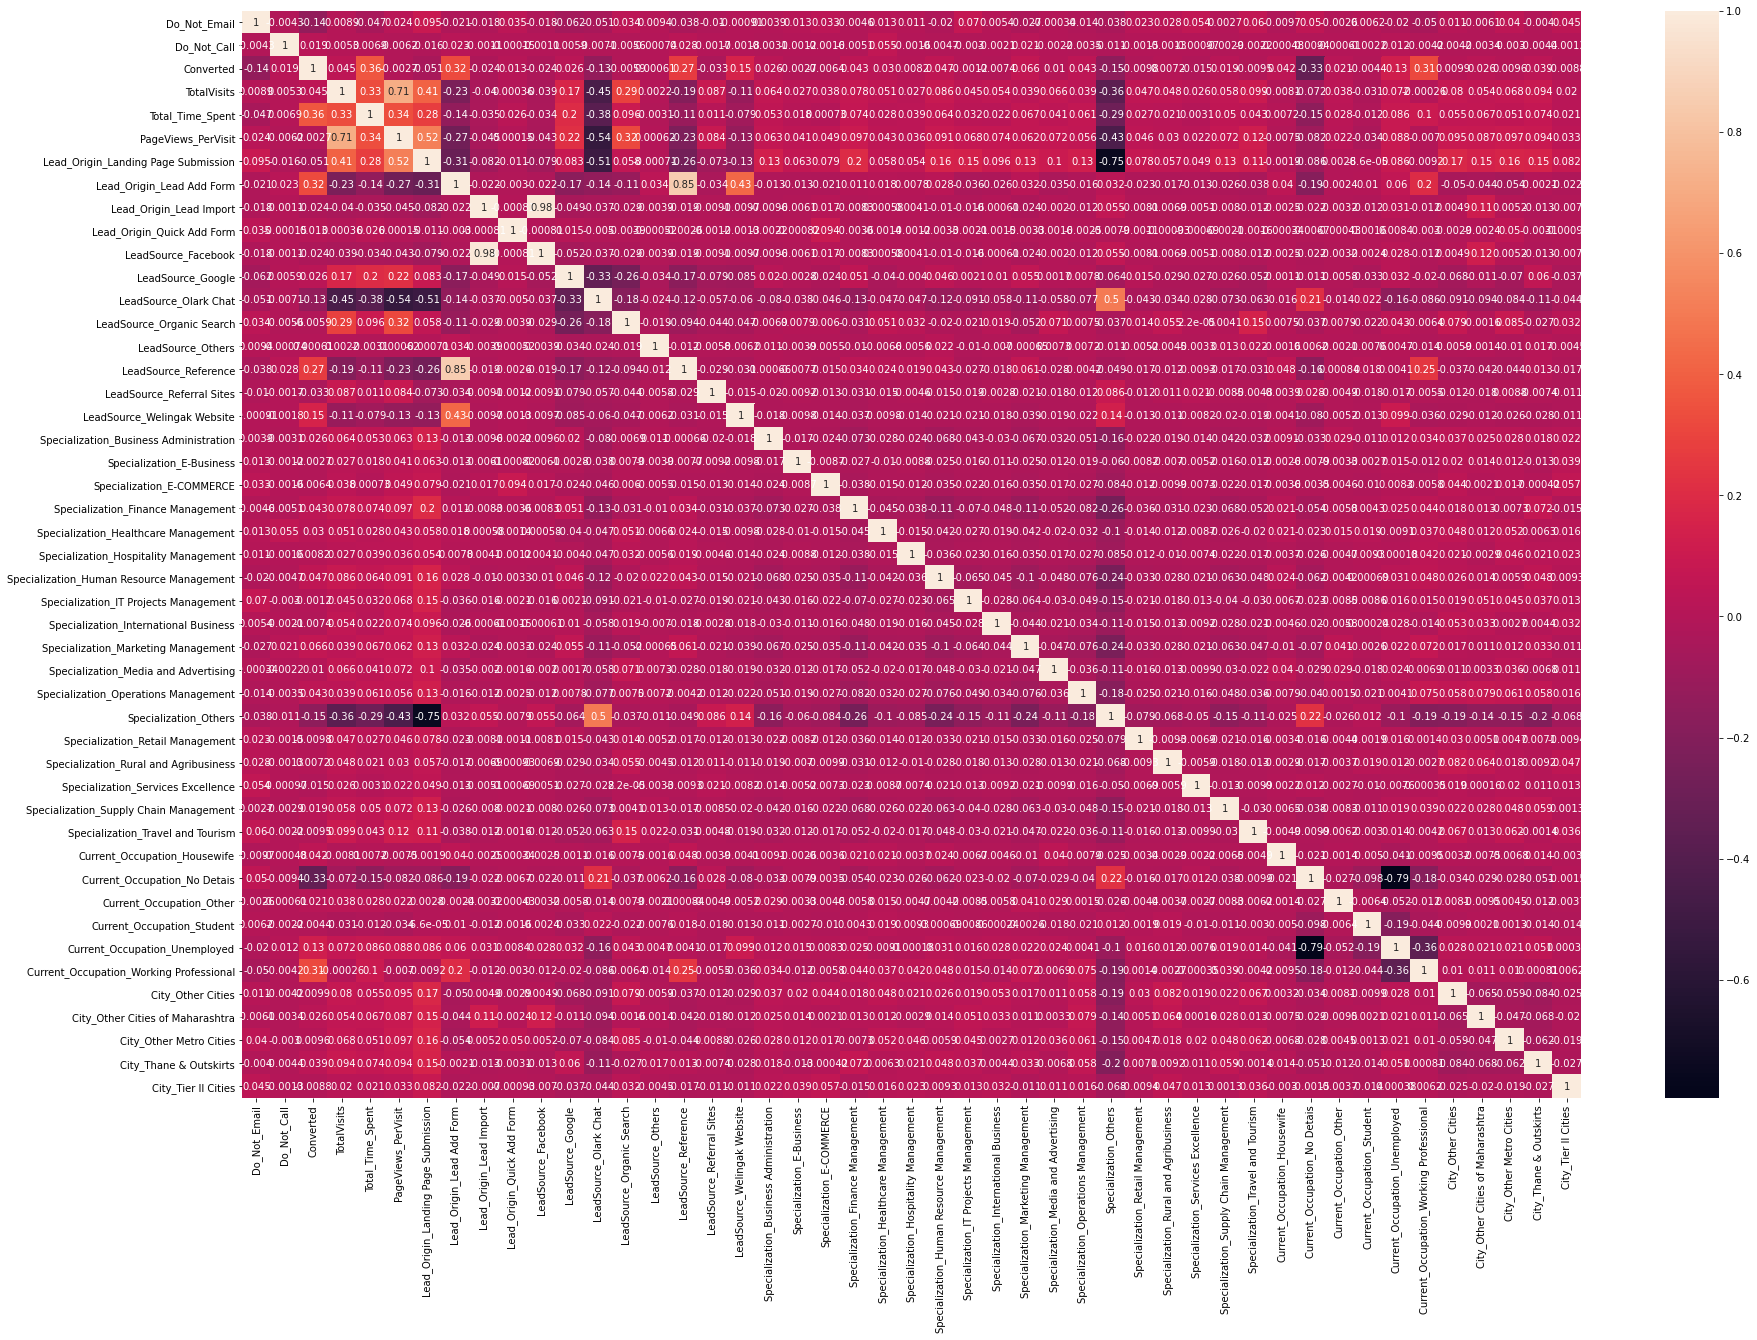

In [80]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,20))        # Size of the figure
sns.heatmap(leads_df.corr(),annot = True)
plt.show()

####  Model Building

In [81]:
import statsmodels.api as sm

In [82]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6421
Model Family:                Binomial   Df Model:                           46
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2829.3
Date:                Mon, 07 Dec 2020   Deviance:                       5658.6
Time:                        18:18:18   Pearson chi2:                 7.74e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.8254      1.011     -1.805      0.071      -3.807       0.156
Do_Not_Email                                -1.2816      0.163     -7.852      0.000      -1.601      -0.962
Do_Not_Call                                 20.2225   3.38e+04      0.001      1.000   -6.62e+04    6.62e+04
TotalVisits                                  0.9702      0.237      4.097      0.000       0.506       1.434
Total_Time_Spent                             3.6596      0.131     27.914      0.000       3.403       3.917
PageViews_PerVisit                          -0.5376      0.241     -2.226      0.026      -1.011      -0.064
Lead_Origin_Landing Page Submission         -0.7015      0.132     -5.328      0.000      -0.959      -0.443
Lead_Origin_Lead Add Form                    3.0412      0.478      6.368      0.000       2.105       3.977
Lead_Origin_Lead Import                     -0.2887      2.285     -0.126      0.899      -4.766       4.189
Lead_Origin_Quick Add Form                  20.4757   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
LeadSource_Facebook                         -0.0076      2.285     -0.003      0.997      -4.486       4.470
LeadSource_Google                            0.3757      0.093      4.018      0.000       0.192       0.559
LeadSource_Olark Chat                        1.2322      0.148      8.319      0.000       0.942       1.522
LeadSource_Organic Search                    0.1958      0.125      1.566      0.117      -0.049       0.441
LeadSource_Others                            0.5493      0.638      0.861      0.389      -0.702       1.800
LeadSource_Reference                         0.4862      0.514      0.946      0.344      -0.521       1.493
LeadSource_Referral Sites                   -0.1808      0.317     -0.570      0.569      -0.803       0.441
LeadSource_Welingak Website                  2.9430      0.861      3.419      0.001       1.256       4.630
Specialization_Business Administration      -0.3283      0.238     -1.381      0.167      -0.794       0.138
Specialization_E-Business                   -0.2335      0.455     -0.513      0.608      -1.125       0.658
Specialization_E-COMMERCE                    0.1161      0.329      0.353      0.724      -0.529       0.761
Specialization_Finance Management           -0.0710      0.201     -0.353      0.724      -0.465       0.323
Specialization_Healthcare Management        -0.0293      0.320     -0.092      0.927      -0.656       0.598
Specialization_Hospitality Management       -1.1565      0.361     -3.202      0.001      -1.864      -0.449
Specialization_Human Resource Management    -0.3229      0.204     -1.580      0.114      -0.724       0.078
Specialization_IT Projects Mana

#### RFE

In [83]:
#Feature Selection using RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [84]:
from sklearn.feature_selection import RFE


In [85]:
#Running RFE with 20 variables as output
rfe = RFE(logreg, 20)             
rfe = rfe.fit(X_train, y_train)
rfe.support_


array([ True, False,  True,  True,  True,  True,  True, False, False,
       False, False,  True, False, False,  True,  True,  True, False,
       False,  True, False, False,  True, False, False,  True, False,
       False, False,  True,  True,  True, False, False, False,  True,
        True,  True, False, False,  True, False, False, False, False,
       False])

In [86]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do_Not_Email', True, 1),
 ('Do_Not_Call', False, 10),
 ('TotalVisits', True, 1),
 ('Total_Time_Spent', True, 1),
 ('PageViews_PerVisit', True, 1),
 ('Lead_Origin_Landing Page Submission', True, 1),
 ('Lead_Origin_Lead Add Form', True, 1),
 ('Lead_Origin_Lead Import', False, 4),
 ('Lead_Origin_Quick Add Form', False, 21),
 ('LeadSource_Facebook', False, 19),
 ('LeadSource_Google', False, 3),
 ('LeadSource_Olark Chat', True, 1),
 ('LeadSource_Organic Search', False, 9),
 ('LeadSource_Others', False, 2),
 ('LeadSource_Reference', True, 1),
 ('LeadSource_Referral Sites', True, 1),
 ('LeadSource_Welingak Website', True, 1),
 ('Specialization_Business Administration', False, 11),
 ('Specialization_E-Business', False, 17),
 ('Specialization_E-COMMERCE', True, 1),
 ('Specialization_Finance Management', False, 26),
 ('Specialization_Healthcare Management', False, 23),
 ('Specialization_Hospitality Management', True, 1),
 ('Specialization_Human Resource Management', False, 12),
 ('Specializat

In [87]:
col = X_train.columns[rfe.support_]
col

Index(['Do_Not_Email', 'TotalVisits', 'Total_Time_Spent', 'PageViews_PerVisit',
       'Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Add Form',
       'LeadSource_Olark Chat', 'LeadSource_Reference',
       'LeadSource_Referral Sites', 'LeadSource_Welingak Website',
       'Specialization_E-COMMERCE', 'Specialization_Hospitality Management',
       'Specialization_International Business', 'Specialization_Others',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness', 'Current_Occupation_Housewife',
       'Current_Occupation_No Detais', 'Current_Occupation_Other',
       'Current_Occupation_Working Professional'],
      dtype='object')

In [88]:
X_train.columns[~rfe.support_]

Index(['Do_Not_Call', 'Lead_Origin_Lead Import', 'Lead_Origin_Quick Add Form',
       'LeadSource_Facebook', 'LeadSource_Google', 'LeadSource_Organic Search',
       'LeadSource_Others', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'Current_Occupation_Student',
       'Current_Occupation_Unemployed', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities'],
      dtype='object')

### StatsModel

In [89]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2844.2
Date:                Mon, 07 Dec 2020   Deviance:                       5688.3
Time:                        18:18:25   Pearson chi2:                 7.92e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.0312      0.145     -7.134      0.000      -1.315      -0.748
Do_Not_Email                               -1.2905      0.161     -8.009      0.000      -1.606      -0.975
TotalVisits                                 0.9605      0.234      4.112      0.000       0.503       1.418
Total_Time_Spent                            3.6587      0.130     28.136      0.000       3.404       3.914
PageViews_PerVisit                         -0.4117      0.234     -1.759      0.079      -0.870       0.047
Lead_Origin_Landing Page Submission        -0.8118      0.123     -6.578      0.000      -1.054      -0.570
Lead_Origin_Lead Add Form                   3.1717      0.472      6.722      0.000       2.247       4.096
LeadSource_Olark Chat                       0.9640      0.127      7.610      0.000       0.716       1.212
LeadSource_Reference                        0.0779      0.501      0.156      0.876      -0.903       1.059
LeadSource_Referral Sites                  -0.4561      0.305     -1.493      0.135      -1.055       0.143
LeadSource_Welingak Website                 2.5572      0.853      2.996      0.003       0.885       4.230
Specialization_E-COMMERCE                   0.2665      0.278      0.957      0.338      -0.279       0.812
Specialization_Hospitality Management      -0.9544      0.318     -3.005      0.003      -1.577      -0.332
Specialization_International Business      -0.3890      0.252     -1.541      0.123      -0.884       0.106
Specialization_Others                      -0.8894      0.119     -7.472      0.000      -1.123      -0.656
Specialization_Retail Management           -0.4056      0.321     -1.262      0.207      -1.036       0.224
Specialization_Rural and Agribusiness       0.3849      0.378      1.017      0.309      -0.357       1.127
Current_Occupation_Housewife               22.3158   1.34e+04      0.002      0.999   -2.63e+04    2.64e+04
Current_Occupation_No Detais               -1.1775      0.083    -14.101      0.000      -1.341      -1.014
Current_Occupation_Other                   -1.0329      0.797     -1.296      0.195      -2.595       0.529
Current_Occupation_Working Professional     2.4249      0.184     13.178      0.000       2.064       2.786
===========================================================================================================
"""

In [90]:
col1 = col.drop('Current_Occupation_Housewife',1)
col1

Index(['Do_Not_Email', 'TotalVisits', 'Total_Time_Spent', 'PageViews_PerVisit',
       'Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Add Form',
       'LeadSource_Olark Chat', 'LeadSource_Reference',
       'LeadSource_Referral Sites', 'LeadSource_Welingak Website',
       'Specialization_E-COMMERCE', 'Specialization_Hospitality Management',
       'Specialization_International Business', 'Specialization_Others',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness', 'Current_Occupation_No Detais',
       'Current_Occupation_Other', 'Current_Occupation_Working Professional'],
      dtype='object')

In [91]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2849.1
Date:                Mon, 07 Dec 2020   Deviance:                       5698.2
Time:                        18:18:25   Pearson chi2:                 7.93e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.0226      0.144     -7.079      0.000      -1.306      -0.739
Do_Not_Email                               -1.2945      0.161     -8.035      0.000      -1.610      -0.979
TotalVisits                                 0.9520      0.234      4.077      0.000       0.494       1.410
Total_Time_Spent                            3.6568      0.130     28.140      0.000       3.402       3.911
PageViews_PerVisit                         -0.4181      0.234     -1.787      0.074      -0.877       0.040
Lead_Origin_Landing Page Submission        -0.8081      0.123     -6.550      0.000      -1.050      -0.566
Lead_Origin_Lead Add Form                   3.1687      0.472      6.714      0.000       2.244       4.094
LeadSource_Olark Chat                       0.9603      0.127      7.584      0.000       0.712       1.209
LeadSource_Reference                        0.0870      0.501      0.174      0.862      -0.894       1.068
LeadSource_Referral Sites                  -0.4556      0.305     -1.491      0.136      -1.054       0.143
LeadSource_Welingak Website                 2.5566      0.853      2.995      0.003       0.884       4.229
Specialization_E-COMMERCE                   0.2610      0.278      0.938      0.348      -0.285       0.807
Specialization_Hospitality Management      -0.9600      0.318     -3.022      0.003      -1.583      -0.337
Specialization_International Business      -0.3945      0.252     -1.563      0.118      -0.889       0.100
Specialization_Others                      -0.8934      0.119     -7.508      0.000      -1.127      -0.660
Specialization_Retail Management           -0.4110      0.321     -1.279      0.201      -1.041       0.219
Specialization_Rural and Agribusiness       0.3791      0.378      1.002      0.316      -0.362       1.121
Current_Occupation_No Detais               -1.1805      0.083    -14.142      0.000      -1.344      -1.017
Current_Occupation_Other                   -1.0358      0.797     -1.300      0.194      -2.598       0.526
Current_Occupation_Working Professional     2.4190      0.184     13.147      0.000       2.058       2.780
===========================================================================================================
"""

In [92]:
col2 = col1.drop('LeadSource_Reference',1)
col2

Index(['Do_Not_Email', 'TotalVisits', 'Total_Time_Spent', 'PageViews_PerVisit',
       'Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Add Form',
       'LeadSource_Olark Chat', 'LeadSource_Referral Sites',
       'LeadSource_Welingak Website', 'Specialization_E-COMMERCE',
       'Specialization_Hospitality Management',
       'Specialization_International Business', 'Specialization_Others',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness', 'Current_Occupation_No Detais',
       'Current_Occupation_Other', 'Current_Occupation_Working Professional'],
      dtype='object')

In [93]:
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2849.1
Date:                Mon, 07 Dec 2020   Deviance:                       5698.2
Time:                        18:18:25   Pearson chi2:                 7.91e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.0212      0.144     -7.080      0.000      -1.304      -0.738
Do_Not_Email                               -1.2973      0.160     -8.087      0.000      -1.612      -0.983
TotalVisits                                 0.9518      0.234      4.076      0.000       0.494       1.409
Total_Time_Spent                            3.6567      0.130     28.139      0.000       3.402       3.911
PageViews_PerVisit                         -0.4187      0.234     -1.790      0.073      -0.877       0.040
Lead_Origin_Landing Page Submission        -0.8091      0.123     -6.565      0.000      -1.051      -0.568
Lead_Origin_Lead Add Form                   3.2425      0.208     15.611      0.000       2.835       3.650
LeadSource_Olark Chat                       0.9601      0.127      7.583      0.000       0.712       1.208
LeadSource_Referral Sites                  -0.4555      0.305     -1.491      0.136      -1.054       0.143
LeadSource_Welingak Website                 2.4834      0.743      3.342      0.001       1.027       3.940
Specialization_E-COMMERCE                   0.2610      0.278      0.938      0.348      -0.285       0.807
Specialization_Hospitality Management      -0.9587      0.317     -3.021      0.003      -1.581      -0.337
Specialization_International Business      -0.3944      0.252     -1.563      0.118      -0.889       0.100
Specialization_Others                      -0.8949      0.119     -7.538      0.000      -1.128      -0.662
Specialization_Retail Management           -0.4109      0.321     -1.279      0.201      -1.041       0.219
Specialization_Rural and Agribusiness       0.3793      0.378      1.003      0.316      -0.362       1.121
Current_Occupation_No Detais               -1.1804      0.083    -14.141      0.000      -1.344      -1.017
Current_Occupation_Other                   -1.0357      0.797     -1.299      0.194      -2.598       0.527
Current_Occupation_Working Professional     2.4193      0.184     13.149      0.000       2.059       2.780
===========================================================================================================
"""

In [94]:
col3 = col2.drop('Specialization_E-COMMERCE',1)
col3

Index(['Do_Not_Email', 'TotalVisits', 'Total_Time_Spent', 'PageViews_PerVisit',
       'Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Add Form',
       'LeadSource_Olark Chat', 'LeadSource_Referral Sites',
       'LeadSource_Welingak Website', 'Specialization_Hospitality Management',
       'Specialization_International Business', 'Specialization_Others',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness', 'Current_Occupation_No Detais',
       'Current_Occupation_Other', 'Current_Occupation_Working Professional'],
      dtype='object')

In [95]:
X_train_sm = sm.add_constant(X_train[col3])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2849.5
Date:                Mon, 07 Dec 2020   Deviance:                       5699.1
Time:                        18:18:25   Pearson chi2:                 7.92e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.0156      0.144     -7.050      0.000      -1.298      -0.733
Do_Not_Email                               -1.2941      0.160     -8.076      0.000      -1.608      -0.980
TotalVisits                                 0.9513      0.233      4.074      0.000       0.494       1.409
Total_Time_Spent                            3.6521      0.130     28.137      0.000       3.398       3.907
PageViews_PerVisit                         -0.4161      0.234     -1.779      0.075      -0.875       0.042
Lead_Origin_Landing Page Submission        -0.8075      0.123     -6.556      0.000      -1.049      -0.566
Lead_Origin_Lead Add Form                   3.2395      0.208     15.600      0.000       2.833       3.647
LeadSource_Olark Chat                       0.9590      0.127      7.574      0.000       0.711       1.207
LeadSource_Referral Sites                  -0.4576      0.305     -1.498      0.134      -1.056       0.141
LeadSource_Welingak Website                 2.4845      0.743      3.343      0.001       1.028       3.941
Specialization_Hospitality Management      -0.9642      0.317     -3.039      0.002      -1.586      -0.342
Specialization_International Business      -0.4006      0.252     -1.588      0.112      -0.895       0.094
Specialization_Others                      -0.8994      0.119     -7.585      0.000      -1.132      -0.667
Specialization_Retail Management           -0.4168      0.321     -1.298      0.194      -1.046       0.213
Specialization_Rural and Agribusiness       0.3730      0.378      0.986      0.324      -0.368       1.114
Current_Occupation_No Detais               -1.1798      0.083    -14.135      0.000      -1.343      -1.016
Current_Occupation_Other                   -1.0406      0.797     -1.306      0.192      -2.603       0.521
Current_Occupation_Working Professional     2.4199      0.184     13.149      0.000       2.059       2.781
===========================================================================================================
"""

In [96]:
col4 = col3.drop('Specialization_Rural and Agribusiness',1)
col4

Index(['Do_Not_Email', 'TotalVisits', 'Total_Time_Spent', 'PageViews_PerVisit',
       'Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Add Form',
       'LeadSource_Olark Chat', 'LeadSource_Referral Sites',
       'LeadSource_Welingak Website', 'Specialization_Hospitality Management',
       'Specialization_International Business', 'Specialization_Others',
       'Specialization_Retail Management', 'Current_Occupation_No Detais',
       'Current_Occupation_Other', 'Current_Occupation_Working Professional'],
      dtype='object')

In [97]:
X_train_sm = sm.add_constant(X_train[col4])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2850.0
Date:                Mon, 07 Dec 2020   Deviance:                       5700.0
Time:                        18:18:25   Pearson chi2:                 7.92e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.0101      0.144     -7.019      0.000      -1.292      -0.728
Do_Not_Email                               -1.2917      0.160     -8.060      0.000      -1.606      -0.978
TotalVisits                                 0.9582      0.233      4.110      0.000       0.501       1.415
Total_Time_Spent                            3.6509      0.130     28.135      0.000       3.397       3.905
PageViews_PerVisit                         -0.4221      0.234     -1.806      0.071      -0.880       0.036
Lead_Origin_Landing Page Submission        -0.8075      0.123     -6.557      0.000      -1.049      -0.566
Lead_Origin_Lead Add Form                   3.2389      0.208     15.599      0.000       2.832       3.646
LeadSource_Olark Chat                       0.9600      0.127      7.582      0.000       0.712       1.208
LeadSource_Referral Sites                  -0.4537      0.306     -1.483      0.138      -1.053       0.146
LeadSource_Welingak Website                 2.4843      0.743      3.343      0.001       1.028       3.941
Specialization_Hospitality Management      -0.9685      0.317     -3.054      0.002      -1.590      -0.347
Specialization_International Business      -0.4051      0.252     -1.607      0.108      -0.899       0.089
Specialization_Others                      -0.9048      0.118     -7.640      0.000      -1.137      -0.673
Specialization_Retail Management           -0.4214      0.321     -1.313      0.189      -1.051       0.208
Current_Occupation_No Detais               -1.1812      0.083    -14.155      0.000      -1.345      -1.018
Current_Occupation_Other                   -1.0458      0.797     -1.312      0.189      -2.608       0.516
Current_Occupation_Working Professional     2.4177      0.184     13.141      0.000       2.057       2.778
===========================================================================================================
"""

In [98]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.487483
6795    0.168911
3516    0.358914
8105    0.661381
3934    0.277901
4844    0.976132
3297    0.194879
8071    0.995532
987     0.127449
7423    0.783145
dtype: float64

In [99]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.48748318, 0.16891084, 0.3589143 , 0.66138052, 0.27790058,
       0.97613163, 0.19487935, 0.99553181, 0.12744889, 0.7831453 ])

In [100]:
#Create df with actual chrun flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.487483,1871
1,0,0.168911,6795
2,0,0.358914,3516
3,0,0.661381,8105
4,0,0.277901,3934


In [101]:
#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.487483,1871,0
1,0,0.168911,6795,0
2,0,0.358914,3516,0
3,0,0.661381,8105,1
4,0,0.277901,3934,0


#### Confusion matrics

In [102]:
from sklearn import metrics

In [103]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)


[[3574  428]
 [ 849 1617]]


In [104]:
# Predicted     not_churn    churn
# Actual
# not_churn        3574      428
# churn            849       1617 

In [105]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8025664811379097


#### Checking VIF

In [106]:
#Checking VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col4].columns
vif['VIF'] = [variance_inflation_factor(X_train[col4].values, i) for i in range(X_train[col4].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,PageViews_PerVisit,5.56
1,TotalVisits,4.02
4,Lead_Origin_Landing Page Submission,3.48
11,Specialization_Others,2.55
2,Total_Time_Spent,2.07
6,LeadSource_Olark Chat,1.92
13,Current_Occupation_No Detais,1.59
5,Lead_Origin_Lead Add Form,1.38
8,LeadSource_Welingak Website,1.27
15,Current_Occupation_Working Professional,1.20


In [107]:
### Dropping variables with high VIF.
col5 = col4.drop('PageViews_PerVisit', 1)
col5


Index(['Do_Not_Email', 'TotalVisits', 'Total_Time_Spent',
       'Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Add Form',
       'LeadSource_Olark Chat', 'LeadSource_Referral Sites',
       'LeadSource_Welingak Website', 'Specialization_Hospitality Management',
       'Specialization_International Business', 'Specialization_Others',
       'Specialization_Retail Management', 'Current_Occupation_No Detais',
       'Current_Occupation_Other', 'Current_Occupation_Working Professional'],
      dtype='object')

In [108]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col5])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2851.6
Date:                Mon, 07 Dec 2020   Deviance:                       5703.3
Time:                        18:18:26   Pearson chi2:                 8.01e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.0825      0.138     -7.825      0.000      -1.354      -0.811
Do_Not_Email                               -1.2872      0.160     -8.032      0.000      -1.601      -0.973
TotalVisits                                 0.7416      0.200      3.700      0.000       0.349       1.134
Total_Time_Spent                            3.6431      0.130     28.107      0.000       3.389       3.897
Lead_Origin_Landing Page Submission        -0.8284      0.123     -6.758      0.000      -1.069      -0.588
Lead_Origin_Lead Add Form                   3.3011      0.205     16.108      0.000       2.899       3.703
LeadSource_Olark Chat                       1.0228      0.122      8.389      0.000       0.784       1.262
LeadSource_Referral Sites                  -0.4814      0.306     -1.573      0.116      -1.081       0.118
LeadSource_Welingak Website                 2.4837      0.743      3.342      0.001       1.027       3.940
Specialization_Hospitality Management      -0.9810      0.318     -3.089      0.002      -1.603      -0.359
Specialization_International Business      -0.4174      0.252     -1.656      0.098      -0.911       0.077
Specialization_Others                      -0.8967      0.118     -7.580      0.000      -1.129      -0.665
Specialization_Retail Management           -0.4191      0.321     -1.305      0.192      -1.048       0.210
Current_Occupation_No Detais               -1.1804      0.083    -14.149      0.000      -1.344      -1.017
Current_Occupation_Other                   -1.0464      0.795     -1.317      0.188      -2.604       0.511
Current_Occupation_Working Professional     2.4148      0.184     13.126      0.000       2.054       2.775
===========================================================================================================
"""

### Making predictions on the test set

In [109]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [110]:
y_train_pred[:10]

array([0.48508326, 0.15852257, 0.37086665, 0.67737595, 0.27759262,
       0.9746991 , 0.19196109, 0.99575863, 0.1208617 , 0.77648085])

In [111]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [112]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,Churn_Prob
0,0,0.487483,1871,0,0.485083
1,0,0.168911,6795,0,0.158523
2,0,0.358914,3516,0,0.370867
3,0,0.661381,8105,1,0.677376
4,0,0.277901,3934,0,0.277593


In [113]:
# Let's check the overall accuracy.
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8034941249226963


In [114]:
#Checking for VIF Again
vif = pd.DataFrame()
vif['Features'] = X_train[col5].columns
vif['VIF'] = [variance_inflation_factor(X_train[col5].values, i) for i in range(X_train[col5].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead_Origin_Landing Page Submission,2.78
1,TotalVisits,2.58
10,Specialization_Others,2.43
2,Total_Time_Spent,2.04
5,LeadSource_Olark Chat,1.86
12,Current_Occupation_No Detais,1.59
4,Lead_Origin_Lead Add Form,1.38
7,LeadSource_Welingak Website,1.27
14,Current_Occupation_Working Professional,1.20
0,Do_Not_Email,1.11


**All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only**

In [115]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3577,  425],
       [ 846, 1620]], dtype=int64)

In [116]:
# Actual/Predicted     not_churn    churn
        # not_churn       3577       425
        # churn            846      1620

In [117]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8034941249226963

### Metrics beyond simply accuracy

In [118]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [119]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.656934306569343

In [120]:
# Let us calculate specificity
TN / float(TN+FP)

0.8938030984507747

In [121]:
# Calculate false postive rate - predicting Conversion when customer does not have Converted
print(FP/ float(TN+FP))

0.10619690154922538


In [122]:
# positive predictive value 
print (TP / float(TP+FP))

0.7921760391198044


In [123]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8087271082975356


#### Plotting ROC curve

#### An ROC curve demonstrates several things:

###### It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
###### The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
###### The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [124]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [125]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Churn_Prob, drop_intermediate = False)

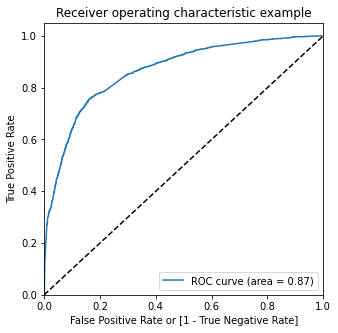

In [126]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Churn_Prob)

#### Finding Optimal Cutoff Point
##### Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [127]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.487483,1871,0,0.485083,1,1,1,1,1,0,0,0,0,0
1,0,0.168911,6795,0,0.158523,1,1,0,0,0,0,0,0,0,0
2,0,0.358914,3516,0,0.370867,1,1,1,1,0,0,0,0,0,0
3,0,0.661381,8105,1,0.677376,1,1,1,1,1,1,1,0,0,0
4,0,0.277901,3934,0,0.277593,1,1,1,0,0,0,0,0,0,0


In [128]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.523346  0.980535  0.241629
0.2   0.2  0.701608  0.900649  0.578961
0.3   0.3  0.793908  0.777778  0.803848
0.4   0.4  0.806895  0.722628  0.858821
0.5   0.5  0.803494  0.656934  0.893803
0.6   0.6  0.791126  0.583131  0.919290
0.7   0.7  0.770717  0.491079  0.943028
0.8   0.8  0.737477  0.354420  0.973513
0.9   0.9  0.714131  0.264396  0.991254


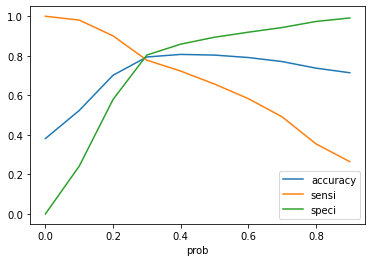

In [129]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [130]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.487483,1871,0,0.485083,1,1,1,1,1,0,0,0,0,0,1
1,0,0.168911,6795,0,0.158523,1,1,0,0,0,0,0,0,0,0,0
2,0,0.358914,3516,0,0.370867,1,1,1,1,0,0,0,0,0,0,1
3,0,0.661381,8105,1,0.677376,1,1,1,1,1,1,1,0,0,0,1
4,0,0.277901,3934,0,0.277593,1,1,1,0,0,0,0,0,0,0,0


In [131]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.793908472479901

In [132]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3217,  785],
       [ 548, 1918]], dtype=int64)

In [133]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [134]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7777777777777778

In [135]:
# Let us calculate specificity
TN / float(TN+FP)

0.803848075962019

In [136]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.196151924037981


In [137]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7095819459859416


In [138]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8544488711819389


#### Precision and Recall
##### Looking at the confusion matrix

In [139]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3577,  425],
       [ 846, 1620]], dtype=int64)

In [140]:
### Precision
### TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7921760391198044

In [141]:
### Recall
### TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])


0.656934306569343

In [142]:
### Using sklearn utilities for the same
from sklearn.metrics import precision_score, recall_score
?precision_score

In [143]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7921760391198044

In [144]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.656934306569343

#### Precision and recall tradeoff

In [145]:
from sklearn.metrics import precision_recall_curve

In [146]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [147]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Churn_Prob)

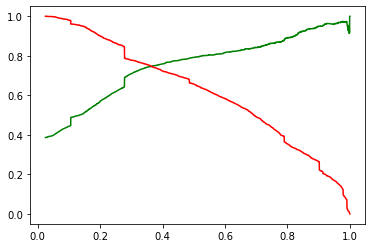

In [148]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Assigning Lead Score

In [149]:
###Assigning Lead Score
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.487483,1871,0,0.485083,1,1,1,1,1,0,0,0,0,0,1,49
1,0,0.168911,6795,0,0.158523,1,1,0,0,0,0,0,0,0,0,0,17
2,0,0.358914,3516,0,0.370867,1,1,1,1,0,0,0,0,0,0,1,36
3,0,0.661381,8105,1,0.677376,1,1,1,1,1,1,1,0,0,0,1,66
4,0,0.277901,3934,0,0.277593,1,1,1,0,0,0,0,0,0,0,0,28


### Making predictions on the test set

In [150]:
X_test[['TotalVisits', 'Total_Time_Spent', 'PageViews_PerVisit']] = scaler.fit_transform(X_test[['TotalVisits', 'Total_Time_Spent', 'PageViews_PerVisit']])

X_train.head()

,Do_Not_Email,Do_Not_Call,TotalVisits,Total_Time_Spent,PageViews_PerVisit,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Origin_Quick Add Form,LeadSource_Facebook,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Others,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_Occupation_Housewife,Current_Occupation_No Detais,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
1871,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6795,0,0,0.235294,0.264586,0.147778,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3516,0,0,0.294118,0.057590,0.277778,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8105,0,0,0.294118,0.668257,0.555556,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3934,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [151]:
X_test = X_test[col5]
X_test.head()

,Do_Not_Email,TotalVisits,Total_Time_Spent,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,LeadSource_Olark Chat,LeadSource_Referral Sites,LeadSource_Welingak Website,Specialization_Hospitality Management,Specialization_International Business,Specialization_Others,Specialization_Retail Management,Current_Occupation_No Detais,Current_Occupation_Other,Current_Occupation_Working Professional
4269,0,0.470588,0.549274,0,0,0,0,0,0,0,1,0,1,0,0
2376,0,0.000000,0.000000,0,1,0,0,0,0,0,1,0,0,0,0
7766,0,0.294118,0.032055,0,0,0,0,0,0,0,0,0,0,0,1
9199,0,0.000000,0.000000,0,0,1,0,0,0,0,1,0,0,0,0
4359,0,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0,0,0


In [152]:
X_test_sm = sm.add_constant(X_test)

In [153]:
### Making prediction
y_test_pred = res.predict(X_test_sm)

In [154]:
y_test_pred[:10]

4269    0.307977
2376    0.789485
7766    0.841202
9199    0.277593
4359    0.901905
9186    0.392254
1631    0.577429
8963    0.211163
8007    0.092827
5324    0.187952
dtype: float64

In [155]:
# Converting y_pred to a df which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4269,0.307977
2376,0.789485
7766,0.841202
9199,0.277593
4359,0.901905


In [156]:
# Converting y_test to df
y_test_df = pd.DataFrame(y_test)

In [157]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [158]:
#Removing index for both df to Concat them vertically
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [159]:
#Concatnating df
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [160]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.307977
1,1,2376,0.789485
2,1,7766,0.841202
3,0,9199,0.277593
4,1,4359,0.901905


In [161]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})


In [162]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,1,4269,0.307977
1,1,2376,0.789485
2,1,7766,0.841202
3,0,9199,0.277593
4,1,4359,0.901905


In [163]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.2 else 0)

In [164]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob,final_predicted
0,1,4269,0.307977,1
1,1,2376,0.789485,1
2,1,7766,0.841202,1
3,0,9199,0.277593,1
4,1,4359,0.901905,1


In [165]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.711038961038961

In [166]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[ 962,  715],
       [  86, 1009]], dtype=int64)

In [167]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [168]:
# Let's see the sensitivity(Recall) of our logistic regression model
TP / float(TP+FN)

0.9214611872146119

In [169]:
#Let us calculate specificity
TN / float(TN+FP)

0.5736434108527132

# Conclusion

The important features responsible for good conversion rate or the one's which
contribute more towards the probability of a lead getting converted are:
 a) Total Time Spent : Recommendation is to add more features/knowledge on
site that visitors spent more time having correct/engaging information.
 b) Lead_Origin_Lead Add Form : The form filling should be reachable with 1
click on every page so that more visitors fill the form. Also the current form
could be shortened so as to have more complete fill rate.
 c) LeadSource_Welingak Website : The commercials should be looked at with
Welingak so that we get more leads from this site. 
As overall accuracy of model is 80 percent, sensitivity is 66 percent and specificity is
89 percent, model seems to be good fit predict the lead probability to conversion.
The model, based on accuracy, achieves the business goals as it meets the target of
80% conversion rate.
As we get more data, we can train the model again, and could get i improved model
and corresponding prediction of leads conversion.
Also we can add more features by collecting the data point for each lead so as to
improve the accuracy.

